# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.124189e+01     6.633022e+00
 * time: 0.00403904914855957
     1     2.747176e+01     5.391279e+00
 * time: 0.011932849884033203
     2     2.630871e+01     1.122746e+01
 * time: 0.0314178466796875
     3     1.303794e+01     2.709998e+00
 * time: 0.05429887771606445
     4     1.261749e+01     3.086114e+00
 * time: 0.0698249340057373
     5     1.195894e+01     1.908997e+00
 * time: 0.08549690246582031
     6     1.043533e+01     1.956818e+00
 * time: 0.10150289535522461
     7     9.926130e+00     1.164690e+00
 * time: 0.11753487586975098
     8     9.788855e+00     7.421111e-01
 * time: 0.1338038444519043
     9     9.654643e+00     7.574047e-01
 * time: 0.14959287643432617
    10     9.598914e+00     5.490736e-01
 * time: 0.16552090644836426
    11     9.559481e+00     5.207427e-01
 * time: 0.1817328929901123
    12     9.520423e+00     6.450838e-01
 * time: 0.19385790824890137
    13     9.487279e+00     4.709347e-01
 * time: 0.

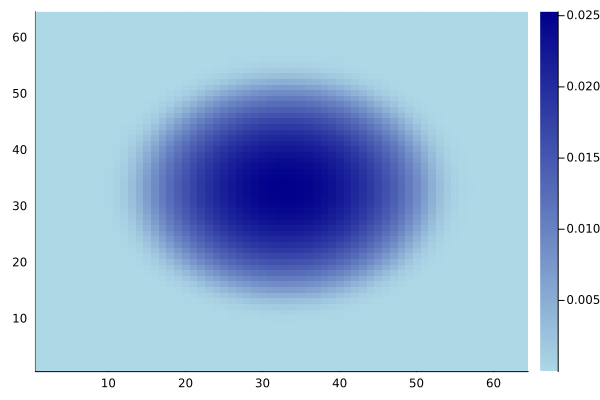

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)